TensorFlow version: 2.18.0
GPU Available:  False
Training data shape: (60000, 784)
Test data shape: (10000, 784)

Training model with relu...
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8106 - loss: 0.6513 - val_accuracy: 0.9531 - val_loss: 0.1599
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9564 - loss: 0.1515 - val_accuracy: 0.9632 - val_loss: 0.1201
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9704 - loss: 0.1015 - val_accuracy: 0.9688 - val_loss: 0.0997
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9773 - loss: 0.0763 - val_accuracy: 0.9705 - val_loss: 0.0954
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9828 - loss: 0.0581 - val_accuracy: 0.9722 - val_loss: 0.0900
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9859 - loss: 0.0461 - val_accuracy: 0.9731 - val_loss: 0.0913
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9892 - loss: 0.0360 - v

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8016 - loss: 0.6607 - val_accuracy: 0.9501 - val_loss: 0.1643
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9556 - loss: 0.1506 - val_accuracy: 0.9648 - val_loss: 0.1132
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9712 - loss: 0.0981 - val_accuracy: 0.9716 - val_loss: 0.0934
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9800 - loss: 0.0698 - val_accuracy: 0.9732 - val_loss: 0.0842
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9845 - loss: 0.0526 - val_accuracy: 0.9739 - val_loss: 0.0828
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9878 - loss: 0.0414 - val_accuracy: 0.9732 - val_loss: 0.0849
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9897 - loss: 0.0349 - val_accuracy: 0.9733 - val_loss: 0.0890
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9911 - loss: 0.0304 - val_accuracy: 0.

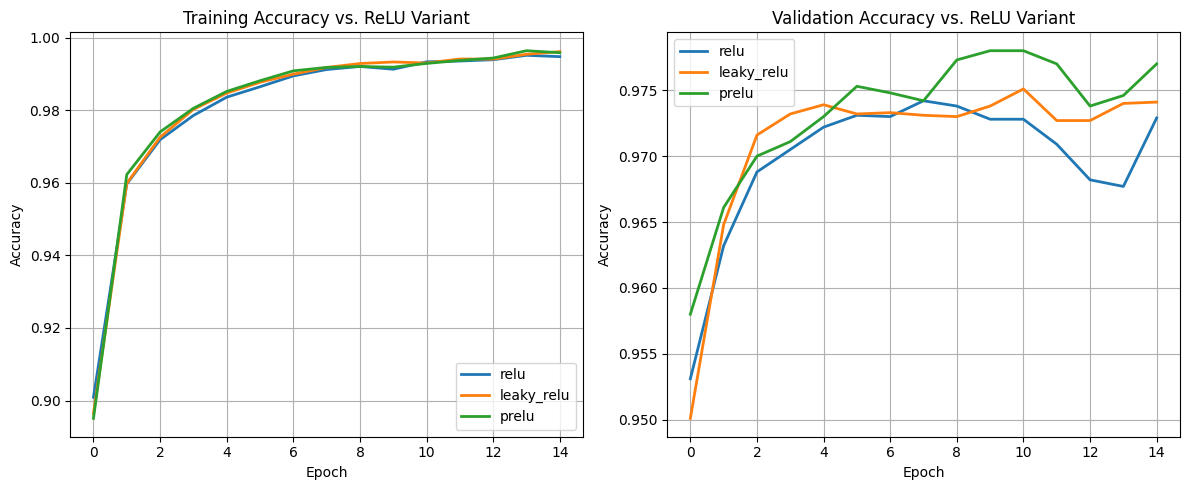

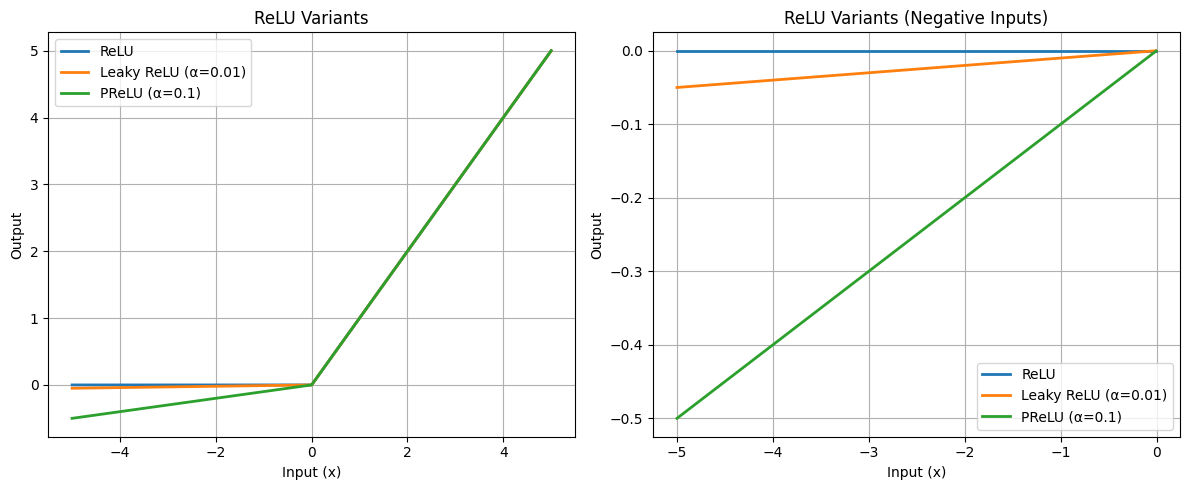

  ReLU Variant Final Train Accuracy Final Val Accuracy Training Time (s)
0         relu               0.9948             0.9729             66.12
1   leaky_relu               0.9962             0.9741             68.64
2        prelu               0.9959             0.9770             67.63


In [23]:

# Deep Learning Assignment - Question 1.2
# ReLU Variants Comparison

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import pandas as pd
import time

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Check if GPU is available
print("TensorFlow version:", tf.__version__)
print("GPU Available: ", len(tf.config.list_physical_devices('GPU')) > 0)

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Function to create a model with specified ReLU variant
def create_relu_model(relu_type):
    model = Sequential()

    if relu_type == 'relu':
        model.add(Dense(128, activation='relu', input_shape=(784,)))
    elif relu_type == 'leaky_relu':
        model.add(Dense(128, input_shape=(784,)))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    elif relu_type == 'prelu':
        model.add(Dense(128, input_shape=(784,)))
        model.add(tf.keras.layers.PReLU())

    if relu_type == 'relu':
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
    elif relu_type == 'leaky_relu':
        model.add(Dense(64))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
        model.add(Dense(32))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
    elif relu_type == 'prelu':
        model.add(Dense(64))
        model.add(tf.keras.layers.PReLU())
        model.add(Dense(32))
        model.add(tf.keras.layers.PReLU())

    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define ReLU variants to test
relu_variants = ['relu', 'leaky_relu', 'prelu']
relu_histories = {}
relu_training_times = {}

# Train models
for variant in relu_variants:
    print(f"\nTraining model with {variant}...")
    model = create_relu_model(variant)
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    end_time = time.time()
    training_time = end_time - start_time
    relu_histories[variant] = history.history
    relu_training_times[variant] = training_time
    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for variant in relu_variants:
    plt.plot(relu_histories[variant]['accuracy'], label=variant, linewidth=2)
plt.title('Training Accuracy vs. ReLU Variant')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for variant in relu_variants:
    plt.plot(relu_histories[variant]['val_accuracy'], label=variant, linewidth=2)
plt.title('Validation Accuracy vs. ReLU Variant')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize ReLU variants
plt.figure(figsize=(12, 5))

x = np.linspace(-5, 5, 1000)

def relu(x): return np.maximum(0, x)
def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)
def prelu(x, alpha=0.1): return np.where(x > 0, x, alpha * x)

plt.subplot(1, 2, 1)
plt.plot(x, relu(x), label='ReLU', linewidth=2)
plt.plot(x, leaky_relu(x), label='Leaky ReLU (α=0.01)', linewidth=2)
plt.plot(x, prelu(x), label='PReLU (α=0.1)', linewidth=2)
plt.title('ReLU Variants')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x[x<0], relu(x[x<0]), label='ReLU', linewidth=2)
plt.plot(x[x<0], leaky_relu(x[x<0]), label='Leaky ReLU (α=0.01)', linewidth=2)
plt.plot(x[x<0], prelu(x[x<0]), label='PReLU (α=0.1)', linewidth=2)
plt.title('ReLU Variants (Negative Inputs)')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Compare final metrics
relu_metrics = {
    'ReLU Variant': [],
    'Final Train Accuracy': [],
    'Final Val Accuracy': [],
    'Training Time (s)': []
}

for variant in relu_variants:
    relu_metrics['ReLU Variant'].append(variant)
    relu_metrics['Final Train Accuracy'].append(f"{relu_histories[variant]['accuracy'][-1]:.4f}")
    relu_metrics['Final Val Accuracy'].append(f"{relu_histories[variant]['val_accuracy'][-1]:.4f}")
    relu_metrics['Training Time (s)'].append(f"{relu_training_times[variant]:.2f}")

relu_df = pd.DataFrame(relu_metrics)
print(relu_df)


